# Image Classification using `CIFAR-10` dataset

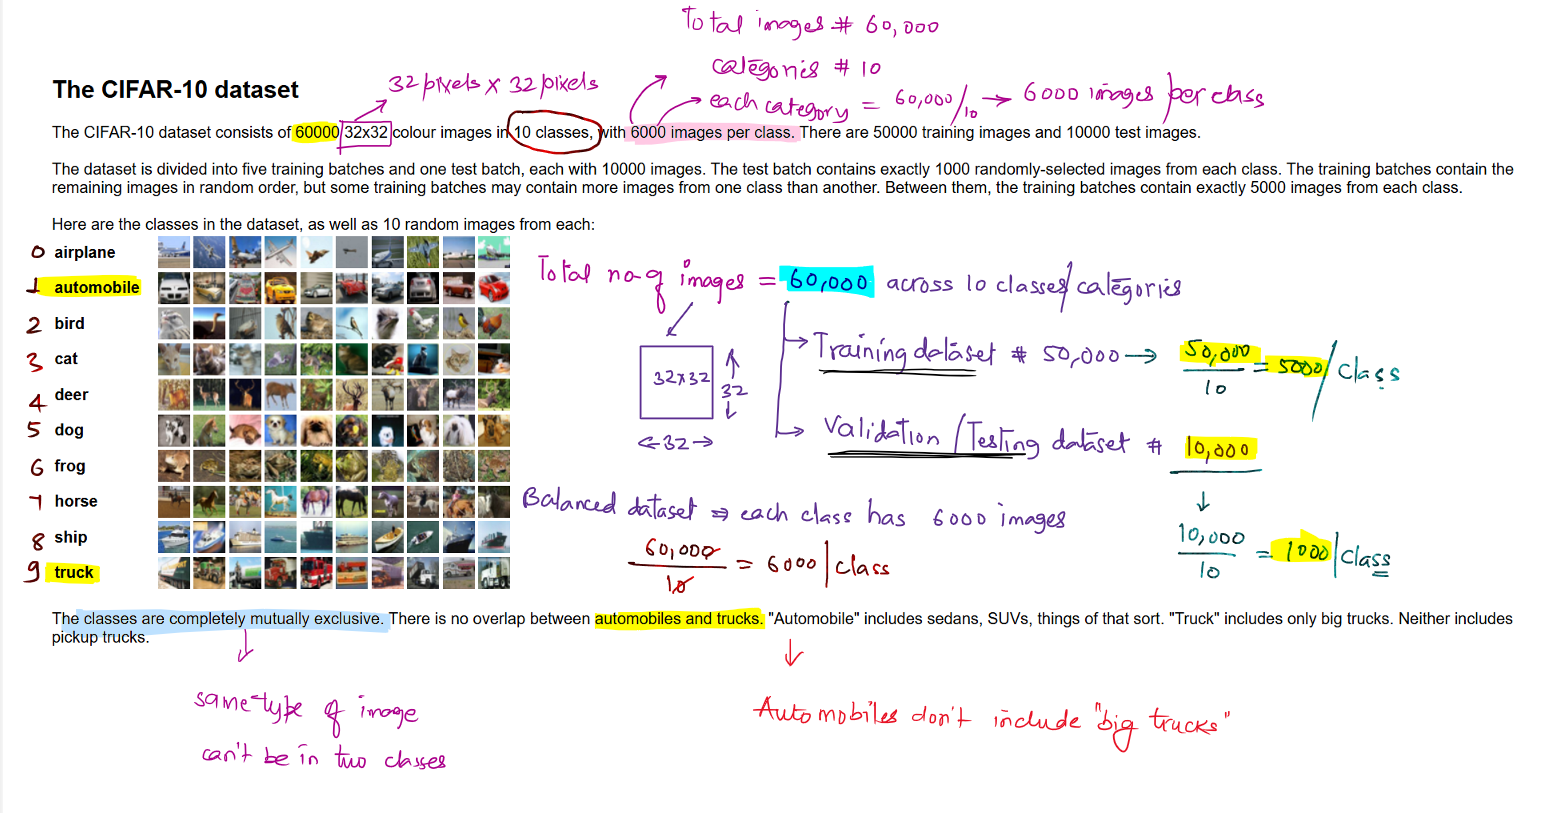

https://www.cs.toronto.edu/~kriz/cifar.html

In [6]:
### Import certain libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [10]:
2+3

5

In [12]:
### Get the current working directory
os.getcwd()

'C:\\Users\\thesi\\OneDrive\\INTELLIPAAT\\DL Sessions\\09. AI and DL IITR-07Sep2025(M)'

### Download & prepare the `CIFAR-10` dataset

*   The CIFAR10 dataset contains **60,000 color images** in `10 classes`, with `6,000 images` in each class.
*   Dataset is divided into **50,000 training images** and **10,000 testing** images.
*   Classes are `mutually exclusive` and there is no overlap between them
*   There is no overlap between `automobiles` and `trucks`. Truck class contains only `big` trucks.

In [16]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() #load the CIFAR-10 dataset directly from tf.keras

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 39s 0us/step


In [18]:
train_images.shape

(50000, 32, 32, 3)

In [24]:
print("Dimension of training dataset is:", train_images.ndim)

Dimension of training dataset is: 4


In [20]:
test_images.shape

(10000, 32, 32, 3)

In [22]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [26]:
print("Shape of the training images:", train_images.shape)
print("Shape of the training labels:", train_labels.shape)

Shape of the training images: (50000, 32, 32, 3)
Shape of the training labels: (50000, 1)


In [28]:
print("Shape of the testing images:", test_images.shape)
print("Shape of the testing labels:", test_labels.shape)

Shape of the testing images: (10000, 32, 32, 3)
Shape of the testing labels: (10000, 1)


In [30]:
train_labels.min(), train_labels.max()

(0, 9)

### Select one image randomly from the `training dataset` & `visualize`

In [33]:
image = train_images[12] #13th image from `50000` images
image

array([[[164, 215, 244],
        [162, 212, 240],
        [162, 212, 240],
        ...,
        [157, 210, 237],
        [153, 208, 235],
        [153, 203, 234]],

       [[168, 218, 245],
        [166, 215, 242],
        [166, 215, 242],
        ...,
        [164, 212, 238],
        [160, 209, 236],
        [158, 205, 235]],

       [[172, 220, 246],
        [170, 217, 243],
        [171, 218, 244],
        ...,
        [168, 212, 238],
        [165, 208, 235],
        [163, 207, 236]],

       ...,

       [[123, 160, 105],
        [117, 154, 102],
        [112, 149,  99],
        ...,
        [117, 136, 100],
        [ 95, 115,  79],
        [120, 149, 100]],

       [[120, 156, 100],
        [116, 151,  99],
        [112, 147,  96],
        ...,
        [126, 149, 110],
        [120, 144, 103],
        [120, 152, 101]],

       [[121, 154,  96],
        [120, 152,  99],
        [116, 148,  97],
        ...,
        [124, 152, 108],
        [124, 154, 107],
        [120, 154, 100]]

In [35]:
image.shape

(32, 32, 3)

In [37]:
###  Extract the `R, G, B` channels
R = image[:, :, 0] #to extract one of the color channels from a color image --> RED
G = image[:, :, 1] #to extract one of the color channels from a color image --> GREEN
B = image[:, :, 2] #to extract one of the color channels from a color image --> BLUE

In [46]:
R.shape`

(32, 32)

In [48]:
R

array([[164, 162, 162, ..., 157, 153, 153],
       [168, 166, 166, ..., 164, 160, 158],
       [172, 170, 171, ..., 168, 165, 163],
       ...,
       [123, 117, 112, ..., 117,  95, 120],
       [120, 116, 112, ..., 126, 120, 120],
       [121, 120, 116, ..., 124, 124, 120]], dtype=uint8)

### Display the original image along with the `RGB` channels

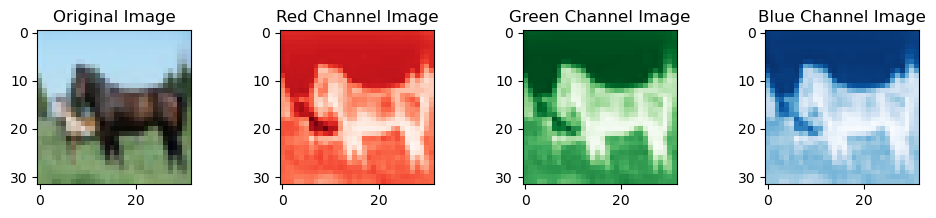

In [42]:
### Setting up the canvas
fig, axs = plt.subplots(nrows=1, ncols=4, figsize = (12,2))

### Original image
axs[0].imshow(image)
axs[0].set_title("Original Image")

### Red channel image
axs[1].imshow(R, cmap='Reds')
axs[1].set_title("Red Channel Image")

### Green channel image
axs[2].imshow(G, cmap='Greens')
axs[2].set_title("Green Channel Image")

### Red channel image
axs[3].imshow(B, cmap='Blues')
axs[3].set_title("Blue Channel Image")

plt.show()

### Let us plot a `few more` but this time with class/label legend


In [51]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [53]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Training Images with class names

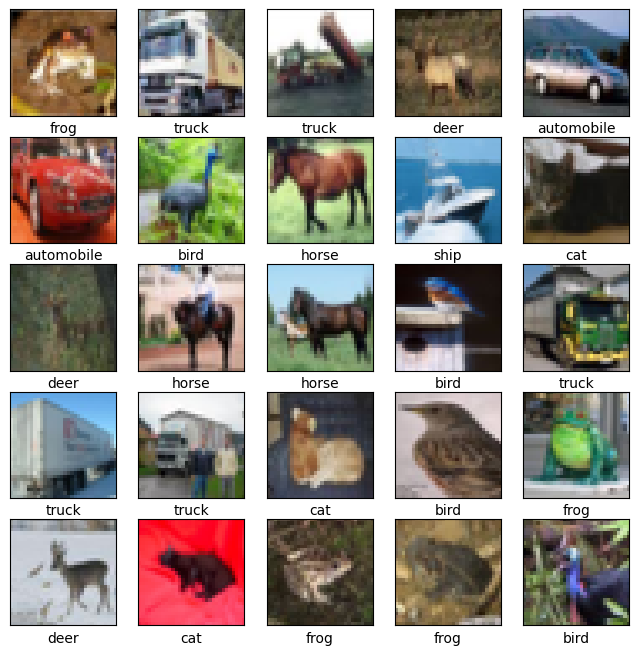

In [66]:
plt.figure(figsize = (8,8))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(train_images[i]) #plot the images from 0 till 24
    plt.xlabel(class_names[train_labels[i][0]]) #tagging the class label to the respective class names using class_names list
plt.show()


### Testing images with class names

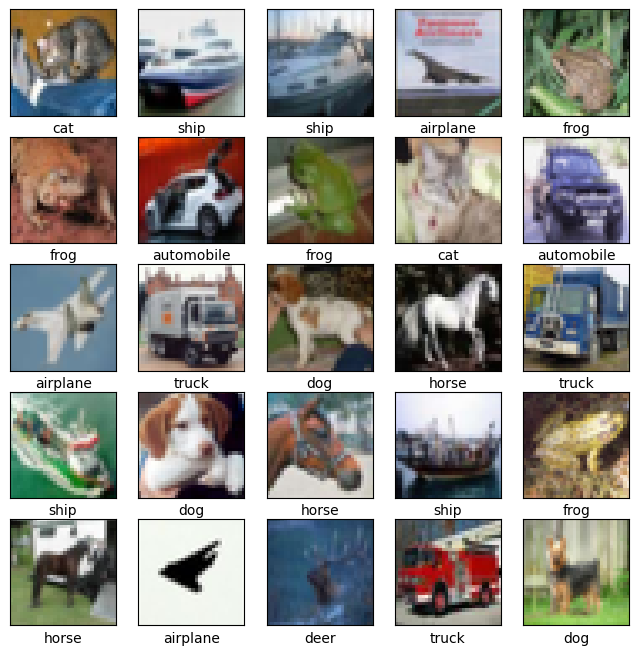

In [59]:
plt.figure(figsize = (8,8))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(test_images[i]) #plot the images from 0 till 24
    plt.xlabel(class_names[test_labels[i][0]]) #tagging the class label to the respective class names using class_names list
plt.show()


### TASK - Try plotting `random` 30-40 images from both `training` and `testing` sets

### Understanding the `CONVOLUTION OPERATION`

In [76]:
from PIL import Image, ImageChops

In [77]:
image_path = r"C:\Users\thesi\OneDrive\INTELLIPAAT\DL Sessions\09. AI and DL IITR-07Sep2025(M)\cat.jpg"

In [78]:
img = Image.open(image_path)

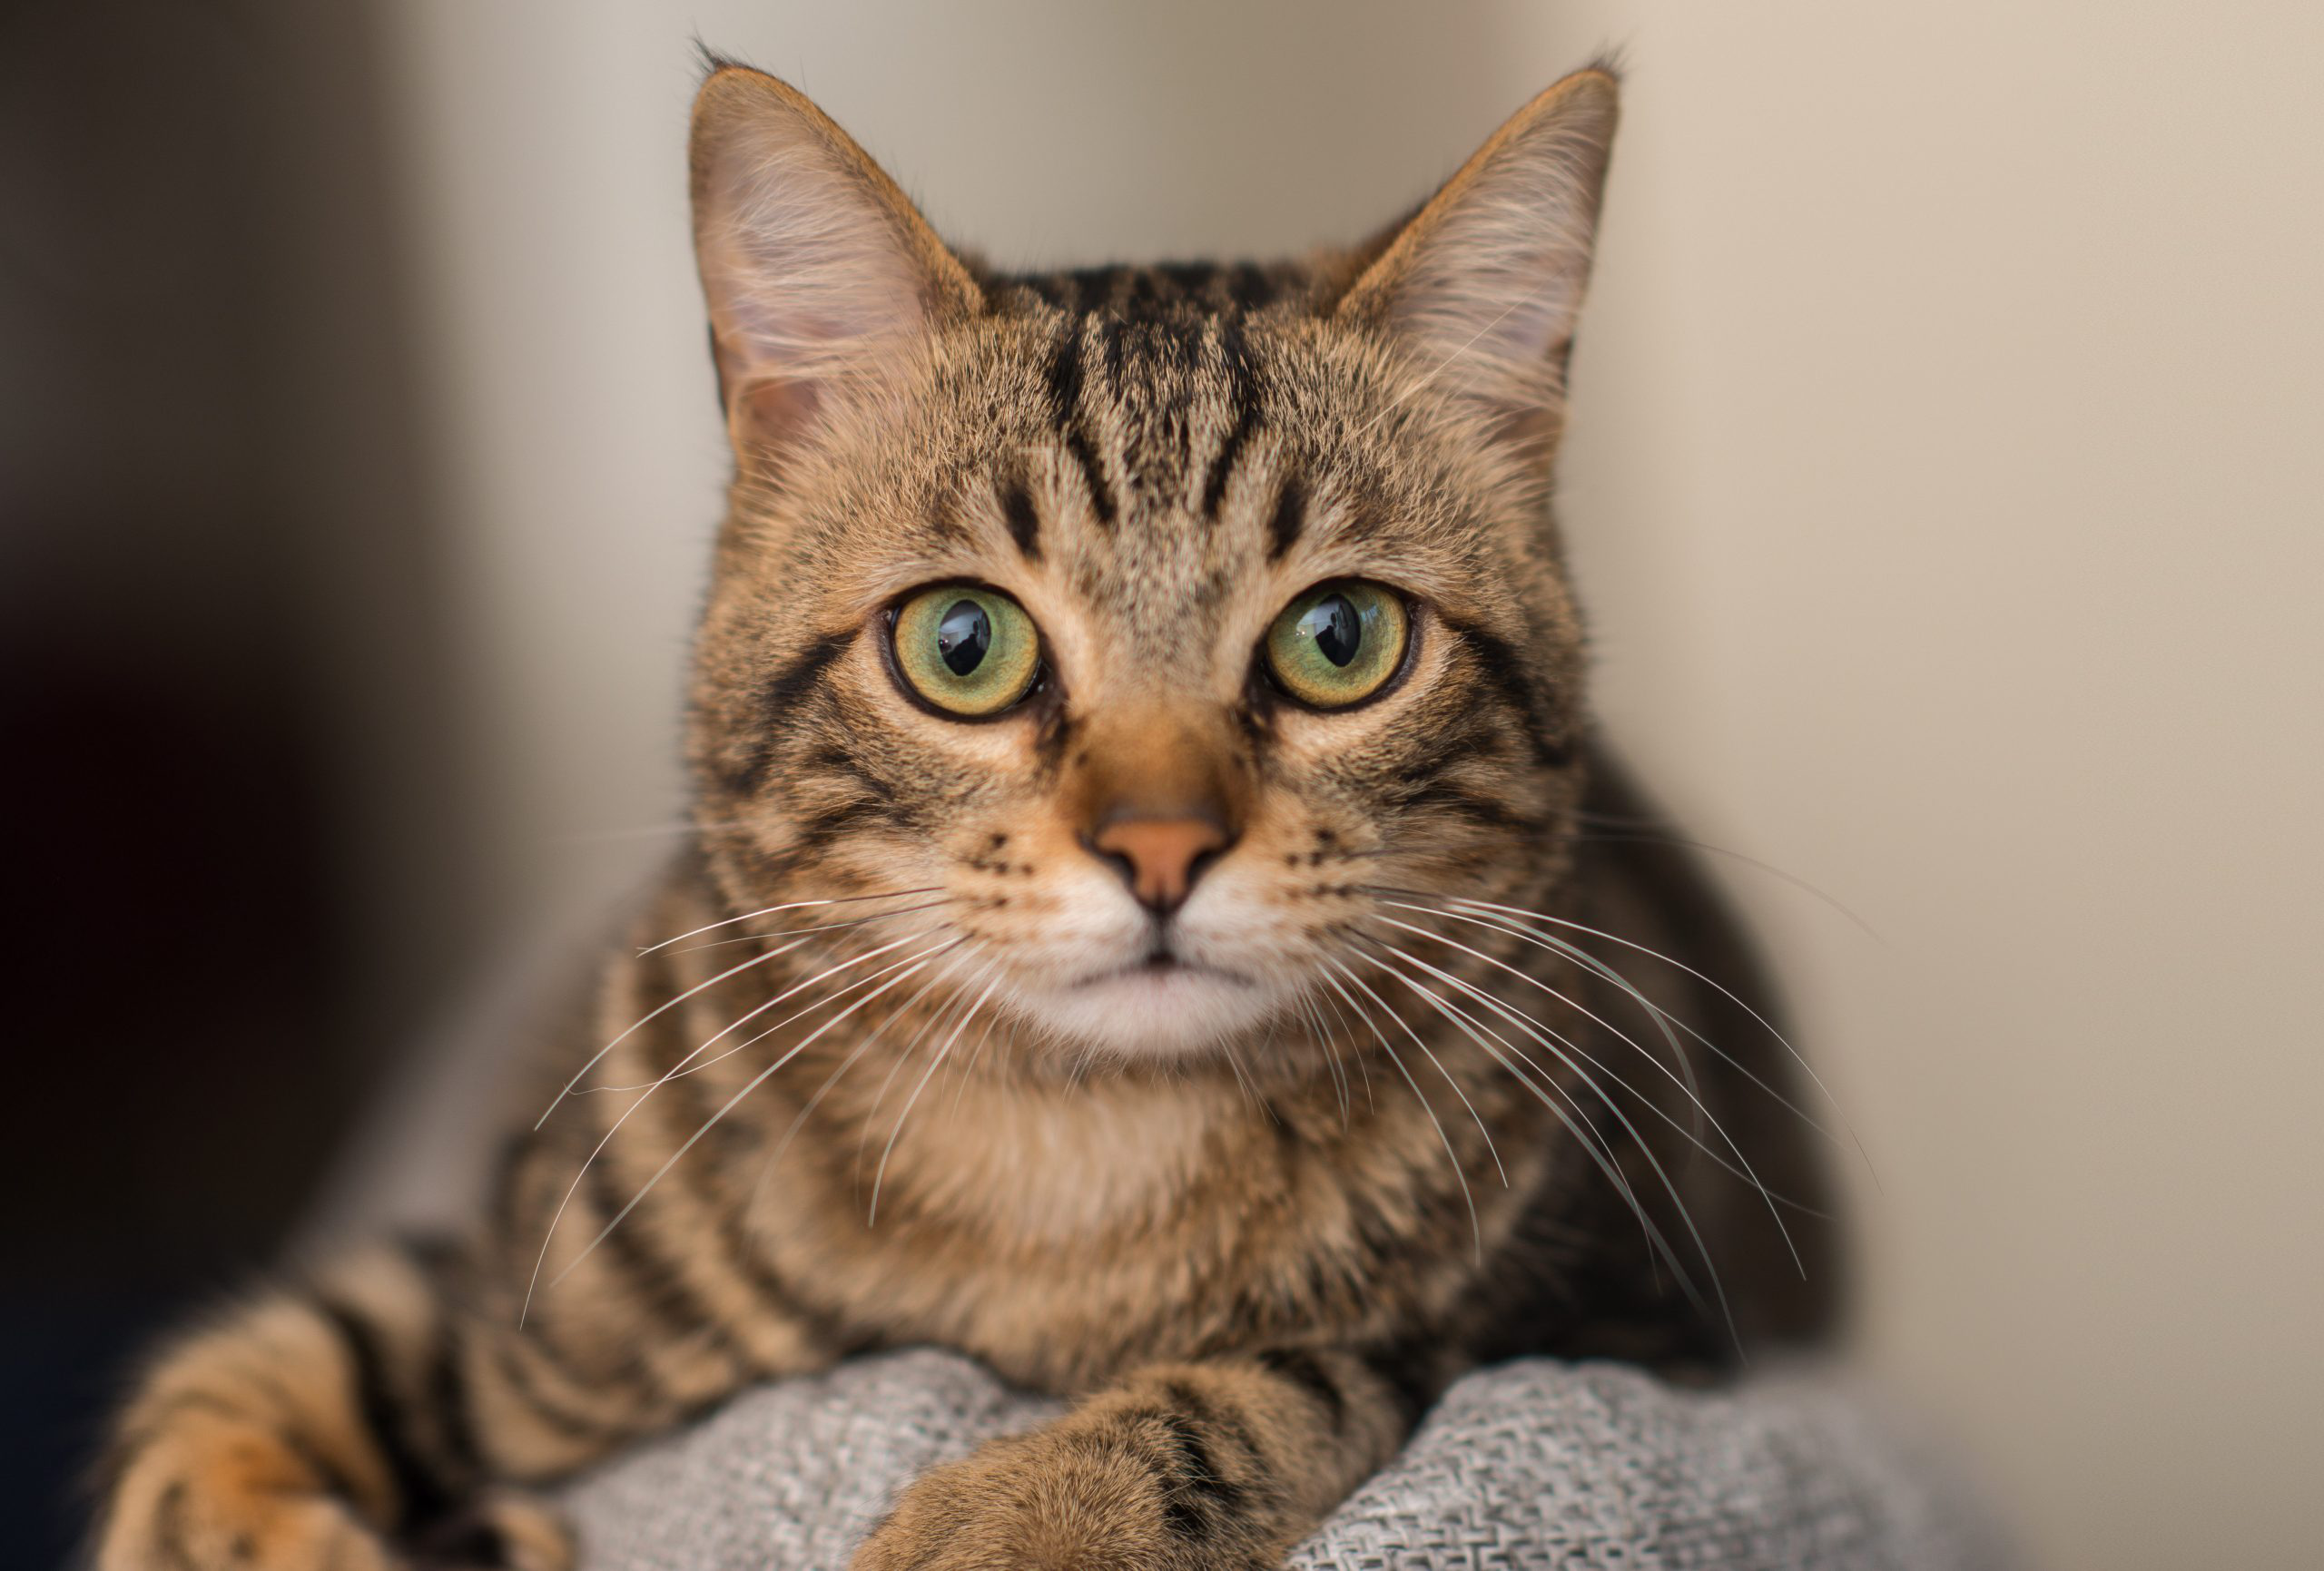

In [82]:
img

In [84]:
### To get the size of the CAT's image
width, height = img.size # (width, height)
print("Width of the CAT's image:", width, "px")
print("Height of the CAT's image:", height, "px")

Width of the CAT's image: 2560 px
Height of the CAT's image: 1731 px


In [94]:
### Let us resize image from its original size to 200 by 200 pixels
img_resized = img.resize((240,200))
width1, height1 = img_resized.size 
print("Width of the CAT's image:", width1, "px")
print("Height of the CAT's image:", height1, "px")

Width of the CAT's image: 240 px
Height of the CAT's image: 200 px


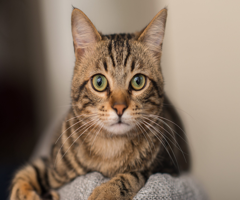

In [96]:
img_resized

#### Convert the `resized cat` into an array

In [106]:
cat_image_array = np.array(img_resized)

In [110]:
cat_image_array.shape

(200, 240, 3)

In [116]:
cat_image_array

array([[[ 40,  33,  27],
        [ 41,  34,  28],
        [ 42,  35,  29],
        ...,
        [212, 195, 177],
        [212, 195, 177],
        [212, 195, 177]],

       [[ 40,  33,  27],
        [ 40,  33,  27],
        [ 43,  35,  29],
        ...,
        [212, 195, 177],
        [212, 195, 177],
        [212, 195, 177]],

       [[ 40,  33,  27],
        [ 42,  35,  29],
        [ 43,  36,  30],
        ...,
        [211, 195, 177],
        [211, 196, 177],
        [210, 196, 177]],

       ...,

       [[ 12,  15,  22],
        [ 12,  15,  22],
        [ 12,  15,  22],
        ...,
        [149, 136, 120],
        [149, 136, 120],
        [149, 136, 120]],

       [[ 12,  15,  22],
        [ 11,  14,  21],
        [ 12,  15,  22],
        ...,
        [148, 135, 119],
        [148, 135, 119],
        [148, 135, 119]],

       [[ 11,  14,  21],
        [ 11,  14,  21],
        [ 12,  15,  22],
        ...,
        [147, 134, 118],
        [147, 134, 118],
        [147, 134, 118]]

### Converting original `CAT` image to `grayscale` image

In [99]:
import cv2

In [114]:
grey_cat = cv2.cvtColor(cat_image_array, cv2.COLOR_RGB2GRAY)
grey_cat

array([[ 34,  35,  36, ..., 198, 198, 198],
       [ 34,  34,  37, ..., 198, 198, 198],
       [ 34,  36,  37, ..., 198, 198, 198],
       ...,
       [ 15,  15,  15, ..., 138, 138, 138],
       [ 15,  14,  15, ..., 137, 137, 137],
       [ 14,  14,  15, ..., 136, 136, 136]], dtype=uint8)

In [118]:
grey_cat.min(), grey_cat.max()

(1, 224)

### let us plot the grayscale CAT

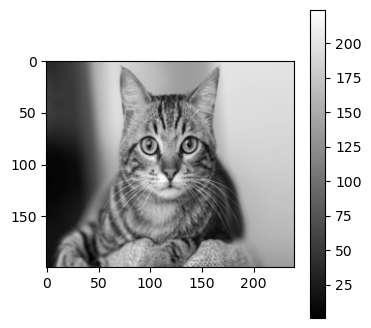

In [121]:
plt.figure(figsize=(4,4))
plt.imshow(grey_cat, cmap='gray')
plt.colorbar()
plt.show()

### Convolution Step

In [126]:
gray_cat = grey_cat

In [128]:
filters = {
    'Original': gray_cat,
    'Sobel X': cv2.Sobel(gray_cat, cv2.CV_64F, 1, 0, ksize = 3),
    'Sobel Y': cv2.Sobel(gray_cat, cv2.CV_64F, 0, 1, ksize = 3),
    'Laplacian': cv2.Laplacian(gray_cat, cv2.CV_64F),
    'Sharpen': cv2.filter2D(gray_cat, -1, kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])),
    'Gaussian Blur': cv2.GaussianBlur(gray_cat, (5,5), 0)
}

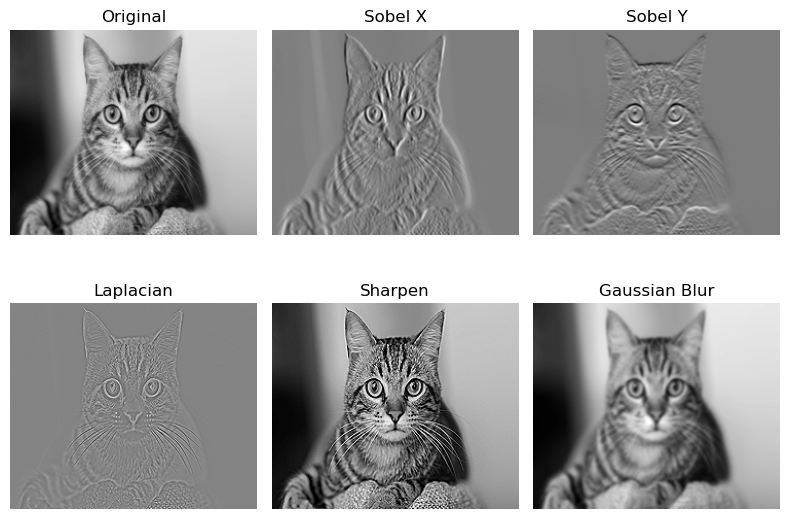

In [132]:
### Plot the results of the above filters
plt.figure(figsize = (8,6))

for i, (title, img) in enumerate(filters.items(),1):
    plt.subplot(2,3,i)
    cmap = 'gray' if len(img.shape)==2 else None
    plt.imshow(img, cmap = cmap)
    plt.title(title)
    plt.axis('off')
    
plt.tight_layout()
plt.show()